In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

cities = pd.read_csv("Cities.csv")
countries = pd.read_csv("Countries.csv")

# 1. Гистограмма - Histogram

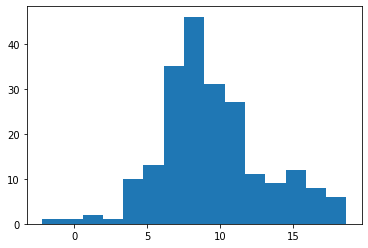

In [2]:
# Библиотека Matplotlib.pyplot
plt.hist(cities['temperature'], bins=15)
plt.show()

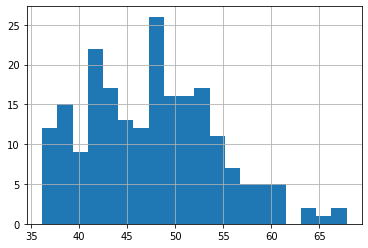

In [3]:
# Библиотека Pandas
cities['latitude'].hist(bins=20)

# Коэффициент асимметрии - Skewness

In [4]:
# Skewness
print(scipy.stats.skew(cities['temperature']))
print(cities['temperature'].skew())

0.2936296212074839
0.29571621698125444


# Коэффициент эксцесса - Kurtosis

In [5]:
# Kurtosis
print(stats.kurtosis(cities['temperature']))
print(cities['temperature'].kurt())

0.3565627832742493
0.393783352552159


# 2. Ящик с усами - Boxplot

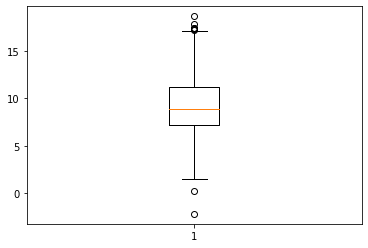

In [6]:
# Библиотека Matplotlib.pyplot
plt.boxplot(cities.temperature)
plt.show()

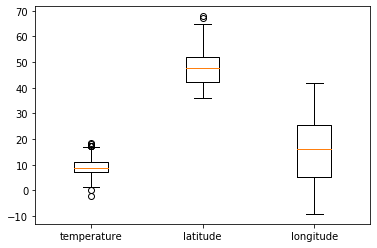

In [7]:
plt.boxplot([cities.temperature, cities.latitude, cities.longitude])
plt.xticks(range(1,4), ['temperature', 'latitude', 'longitude']) # переименовываем отметки на оси x c 1 до 3 на названия
plt.show()

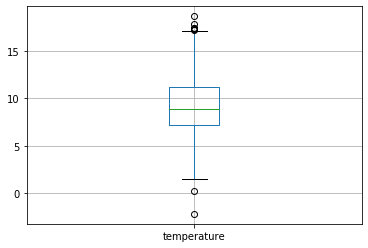

In [8]:
# Библиотека Pandas
cities.boxplot('temperature')

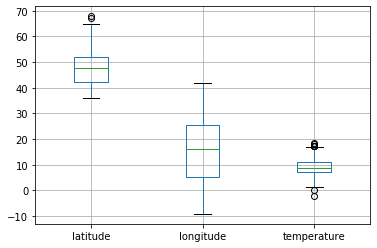

In [9]:
cities.boxplot()

# 3. Линейный график - Line graph

Формы маркеров: https://matplotlib.org/3.2.1/api/markers_api.html 
Цвета: https://matplotlib.org/2.0.2/api/colors_api.html

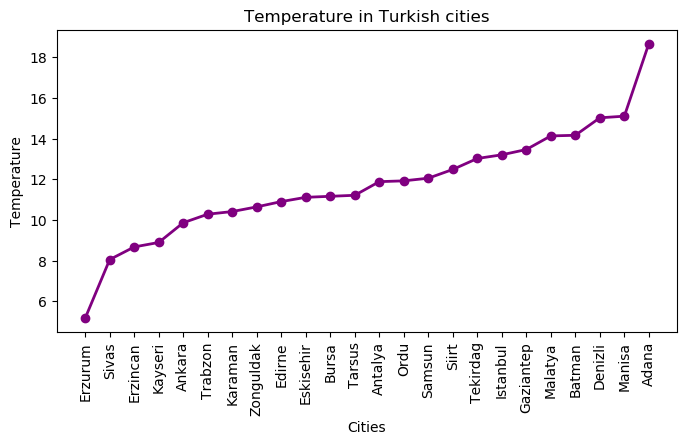

In [10]:
# Выберем все города Турции и отсортируем их температуры по возрастанию
country = 'Turkey'
df = cities[cities['country'].isin([country])].sort_values(by='temperature')
x = df['city']
y = df['temperature']

plt.figure(figsize=(8,4), dpi = 100) # dpi - dots per inches (default=100)
plt.plot(x, y, color='purple', linewidth=2, marker='o')
# Подпись каждой из осей
plt.xlabel('Cities')
plt.ylabel('Temperature')
# Разворачиваем отметки на оси x вертикально
plt.xticks(rotation=90)
# Название всего графика
plt.title("Temperature in Turkish cities")

# Сохранить график в формате png. Файл сохранится в вашей рабочей директории.
#plt.savefig("Line.png")

# Для сохранения в других форматах введите формат файла (pdf, jpg, svg), после названия и точки
# Функция savefig(), впрочем, как и все остальные функции должна стоять до функции show()
# Если поставить ее после - то вместо рисунка сохранится просто пустой белый шаблон
plt.show()

# 4. Точечный график -  Scatter Plot

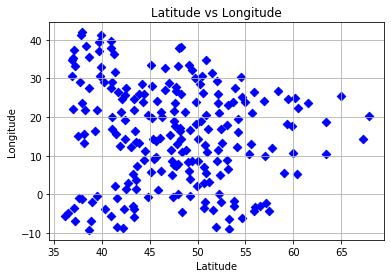

In [11]:
latitude = np.array(cities.latitude)
longitude = cities.longitude
plt.scatter(latitude, longitude, color='b', marker='D', linewidth=1)
# Название всего графика
plt.title('Latitude vs Longitude')

# Подпись каждой из осей
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Добавление сетчатой разметки
plt.grid(which='major')

# 5. Частотный график (гистограмма) - Bar chart 

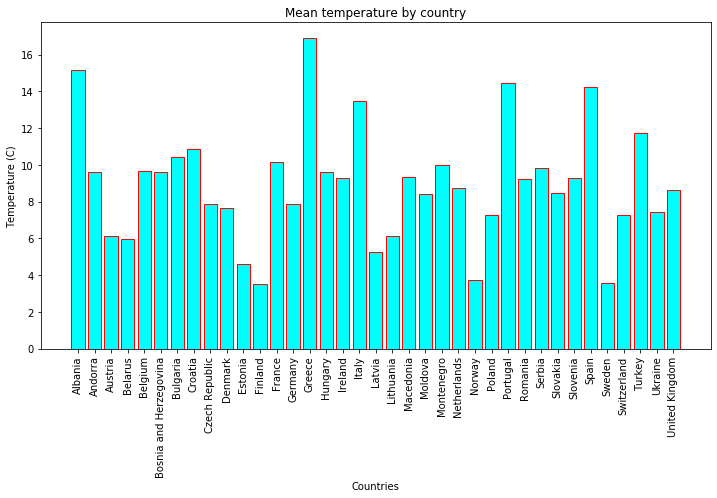

In [12]:
# Сгруппируем города по странам и нарисуем среднюю температуру для каждой страны
df = cities.groupby('country').mean()

x = df.index
y = df.temperature

plt.figure(figsize=(12,6))
plt.bar(x,y, color='cyan', edgecolor = 'red') #  Еdgecolor = цвет границы/каемки
# Название всего графика
plt.title('Mean temperature by country')
# Подпись каждой из осей
plt.xlabel('Countries')
plt.ylabel('Temperature (C)')
# Разворачиваем отметки на оси x вертикально
plt.xticks(rotation=90)
plt.show()

# 6. Несколько графиков на одной фигуре (наборе осей)

расположение легенды: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

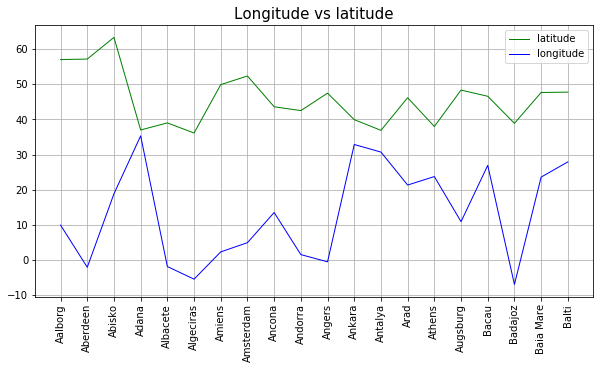

In [22]:
# Возьмем первые 20 городов из таблицы и начертим графики их долготы и широты
city = cities.city[0:20]
latitude = cities.latitude[0:20]
longitude = cities.longitude[0:20]

plt.figure(figsize=(10,5))
plt.plot(city, latitude, c='g', linewidth=1, label='latitude') # Label добавляет подпись/пояснение к графику
plt.plot(city, longitude, c='b', linewidth=1, label='longitude')
plt.legend(loc=1, fontsize=10) # Легенда добавляет надпись и цветовое пояснение каждого из графиков
plt.title("Longitude vs latitude", fontsize=15)
# Разворачиваем отметки на оси x вертикально
plt.xticks(rotation=90)
# Добавление сетчатой разметки
plt.grid(which='both')
plt.show()

# 7. Точечный график c цветовой группировкой

In [14]:
# Объединим таблицы городов и стран
df = pd.merge(cities, countries, on='country')

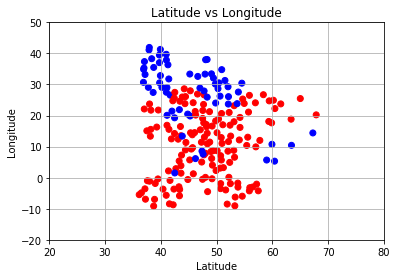

In [15]:
# Создадим список, содержащий цвета red/blue для EU = yes/no
clrs = ['red' if x=='yes' else 'blue' for x in df.EU]

plt.scatter(df.latitude, df.longitude, color=clrs)

# Установим новые лимиты на оси
plt.xlim(20, 80)
plt.ylim(-20, 50)

# Добавим название графика
plt.title('Latitude vs Longitude')

# Подпись каждой из осей
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Добавление сетчатой разметки
plt.grid(which='major')

# 8. Круговая диаграмма - Pie Chart

In [16]:
# Сосчитаем количество городов в EU/non-EU странах
eu_group = df.groupby('EU').count()
eu_group

,city,country,latitude,longitude,temperature,population,coastline
EU,,,,,,,
no,63,63,63,63,63,63,63
yes,150,150,150,150,150,150,150


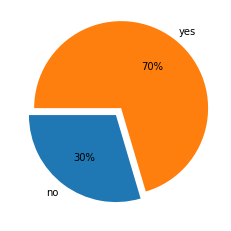

In [17]:
explode = (0, 0.1) # Акцент на какой-либо из частей

labs = eu_group.index # Берем индексы из таблицы как название категорий yes/no
plt.pie(eu_group.city, explode=explode, labels=labs, startangle=180, autopct='%1.f%%')
# Если акцента на части нет, то можно удалить параметр explode
plt.show()

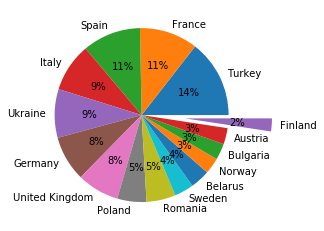

In [18]:
# Сгруппируем страны и посчитаем количество городов в каждой. Отсортируем по убыванию
b = cities.groupby('country').count().sort_values(by='city', ascending=False)

# Выберем первые 15 стран
city = b.city[0:15]

# Достанем названия стран из индекса новой таблицы
labs = b.index
# Возьмем первые 15 названий стран
labs = labs[:15]

# Cоздадим вектор 0 для акцентов
expl = np.zeros(15)
# Сделаем ненулевой акцент на последней стране
expl[-1]= 0.5


plt.pie(city, labels=labs, explode=expl, autopct='%1.f%%')
plt.show()

# 9. Множество графиков для сравнения - Subplots

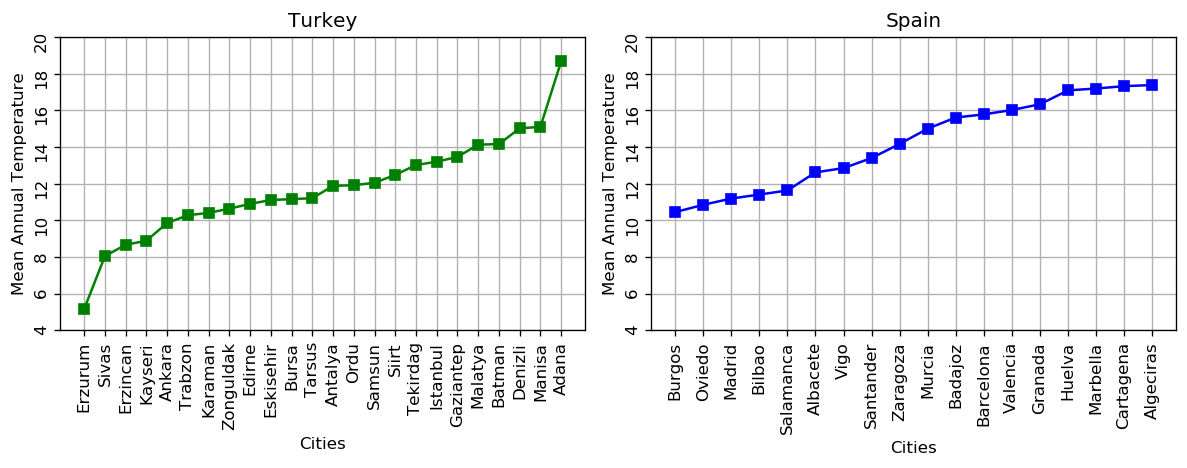

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), dpi=120)

# Выберем все города Турции и отсортируем их температуры по возрастанию
country = 'Turkey'
df1 = cities[cities['country'].isin([country])].sort_values(by='temperature')
x1 = df1['city']
y1 = df1['temperature']

# Выберем все города Испании и отсортируем их температуры по возрастанию
country = 'Spain'
df2 = cities[cities['country'].isin([country])].sort_values(by='temperature')
x2 = df2['city']
y2 = df2['temperature']

# Строим графики на разных осях
ax1.plot(x1, y1, color='g', marker='s')  # greendots
ax2.plot(x2, y2, color='b', marker='s')  # greendots

# Даем названия каждому набору осей
ax1.set_title('Turkey')
ax2.set_title('Spain')

# Подписываем x-оси
ax1.set_xlabel('Cities')  
ax2.set_xlabel('Cities')  # x label

# Подписываем y-оси
ax1.set_ylabel('Mean Annual Temperature')  
ax2.set_ylabel('Mean Annual Temperature')  # y label

# ax1.set_xlim(-1, len(x1)+1) ;  ax2.set_xlim(-1, len(x2)+1)   # x axis limits
ax1.set_ylim(4, 20);  ax2.set_ylim(4, 20)  # y axis limits

# Разворачиваем отметки на осях x и y вертикально
ax1.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)

plt.tight_layout() # Оптимизировать репрезентацию всей фигуры
# Добавление сетчатой разметки
ax1.grid()
ax2.grid()

plt.show()

# 10. Side-by-Side Bar Charts

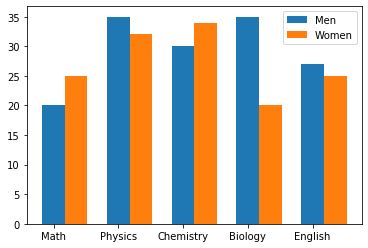

In [20]:
# Создаем вымышленные значения для двух групп
menMeans = [20, 35, 30, 35, 27]
womenMeans = [25, 32, 34, 20, 25]

# Создаем числовые индексы-позиции для каждого значения
ind = np.arange(0, len(menMeans)) 

# Определяем широту каждого столбика
width = 0.35 

plt.bar(ind, menMeans , width, align='center', label='Men')
# Cтолбики для второй категории начинают рисоваться с отступом равным width
plt.bar(ind + width, womenMeans, width, align='center', label='Women') 

# Даем названия группам по оси х
plt.xticks(ind, ['Math', 'Physics', 'Chemistry', 'Biology', 'English'])
plt.legend()
plt.show()

# 11. Stacked Bar Charts

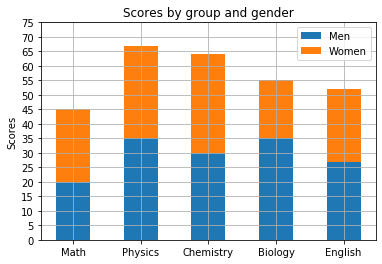

In [21]:
# Создаем вымышленные значения для двух групп
menMeans = [20, 35, 30, 35, 27]
womenMeans = [25, 32, 34, 20, 25]

# Создаем числовые индексы-позиции для каждого значения
ind = np.arange(0, len(menMeans)) 

# Определяем широту каждого столбика
width = 0.5

plt.bar(ind, menMeans, width, label='Men')
# Cтолбики для второй категории начинают рисоваться поверх соответствующих столбиков из первой категории
# при помощи параметра bottom
plt.bar(ind, womenMeans, width, bottom=menMeans, label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('Math', 'Physics', 'Chemistry', 'Biology', 'English'))
plt.yticks(np.arange(0, 80, 5))
plt.grid()
plt.legend()
plt.show()